### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1: Data Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1.1 Data Loading

Load the dataset to a data frame

In [3]:
data = pd.read_csv('/content/drive/MyDrive/CS5228/project/train.csv')

data.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
0,1292132,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",2018.0,NaN,08-mar-2018,suv,parf car,...,96000.0,88906.0,132031.0,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",...,85680.0,40678.0,43950.0,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0
2,1311717,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,2007.0,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,138000.0,27994.0,30794.0,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0
3,1310068,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,2008.0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,160000.0,16084.0,16084.0,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0
4,1325280,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,2006.0,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",...,183000.0,50414.0,55456.0,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0


1.2 Data Overview

View data dimensions:


In [4]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")


The dataset has 25000 rows and 30 columns.


Get data types and non-null counts:

1.3 Data Information

Get data types and non-null counts:

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   listing_id         25000 non-null  int64  
 1   title              25000 non-null  object 
 2   make               23684 non-null  object 
 3   model              25000 non-null  object 
 4   description        24320 non-null  object 
 5   manufactured       24993 non-null  float64
 6   original_reg_date  255 non-null    object 
 7   reg_date           25000 non-null  object 
 8   type_of_vehicle    25000 non-null  object 
 9   category           25000 non-null  object 
 10  transmission       25000 non-null  object 
 11  curb_weight        24693 non-null  float64
 12  power              22360 non-null  float64
 13  fuel_type          5879 non-null   object 
 14  engine_cap         24404 non-null  float64
 15  no_of_owners       24982 non-null  float64
 16  depreciation       244

1.4 Basic Statistics

Statistics for numerical features:

In [ ]:
data.describe()


,listing_id,manufactured,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,indicative_price,price
count,2.500000e+04,24993.000000,24693.000000,22360.000000,24404.000000,24982.000000,24493.000000,25000.000000,22368.000000,2.478000e+04,1.969600e+04,24936.000000,2.482600e+04,0.0,2.500000e+04
mean,1.299377e+06,2015.645181,1580.784109,140.908095,2059.310441,2.289328,20466.481444,48935.722720,1462.160899,4.603714e+04,8.593014e+04,41464.935274,4.472783e+04,NaN,1.151486e+05
std,3.507003e+04,5.723515,837.961160,81.675265,1073.197922,1.489925,19768.630796,21584.778467,1377.161884,6.135528e+04,5.162519e+04,48374.987804,7.911383e+04,NaN,1.555725e+05
min,3.652410e+05,1939.000000,435.000000,0.000000,0.000000,1.000000,1770.000000,2605.000000,50.000000,1.100000e+01,1.000000e+00,426.000000,2.300000e+01,NaN,7.000000e+02
25%,1.291592e+06,2014.000000,1295.000000,90.000000,1496.000000,1.000000,13430.000000,35001.000000,684.000000,1.814300e+04,5.032475e+04,19990.000000,1.364600e+04,NaN,4.914100e+04
50%,1.308018e+06,2017.000000,1480.000000,111.000000,1797.000000,2.000000,15850.000000,45289.000000,1107.000000,2.896800e+04,8.400000e+04,28480.000000,2.524100e+04,NaN,7.888800e+04
75%,1.321186e+06,2019.000000,1700.000000,155.000000,2151.000000,3.000000,20780.000000,55889.000000,1630.000000,5.173025e+04,1.160000e+05,42373.250000,4.565275e+04,NaN,1.258000e+05
max,1.332660e+06,2024.000000,25620.000000,735.000000,15681.000000,6.000000,607730.000000,158004.000000,12375.000000,1.114652e+06,1.290000e+06,811764.000000,1.491920e+06,NaN,2.899999e+06


Statistics of classification characteristics:

In [6]:
data.describe(include=['O'])


,title,make,model,description,original_reg_date,reg_date,type_of_vehicle,category,transmission,fuel_type,opc_scheme,lifespan,eco_category,features,accessories
count,25000,23684,25000,24320,255,25000,25000,25000,25000,5879,162,2329,25000,24157,21187
unique,7263,95,799,19765,219,4705,11,245,2,5,3,1482,1,16769,16939
top,Honda Vezel 1.5A X,toyota,amg,0,01-jan-1983,31-mar-2017,suv,"parf car, premium ad car",auto,diesel,revised opc scheme . learn more about opc sche...,29-mar-2043,uncategorized,view specs of the toyota hiace,all vehicles have gone through a rigorous 160 ...
freq,296,3150,809,1497,5,52,5905,4935,23301,2586,155,12,25000,228,621


2.1 Checking Missing Values

Calculate the number and proportion of missing values for each feature:

In [7]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / data.shape[0]) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
missing_data


,Missing Values,Percentage
indicative_price,25000,100.000
opc_scheme,24838,99.352
original_reg_date,24745,98.980
lifespan,22671,90.684
fuel_type,19121,76.484
mileage,5304,21.216
accessories,3813,15.252
power,2640,10.560
road_tax,2632,10.528
make,1316,5.264


2.2 Visualizing missing values

Heat map shows missing value location:

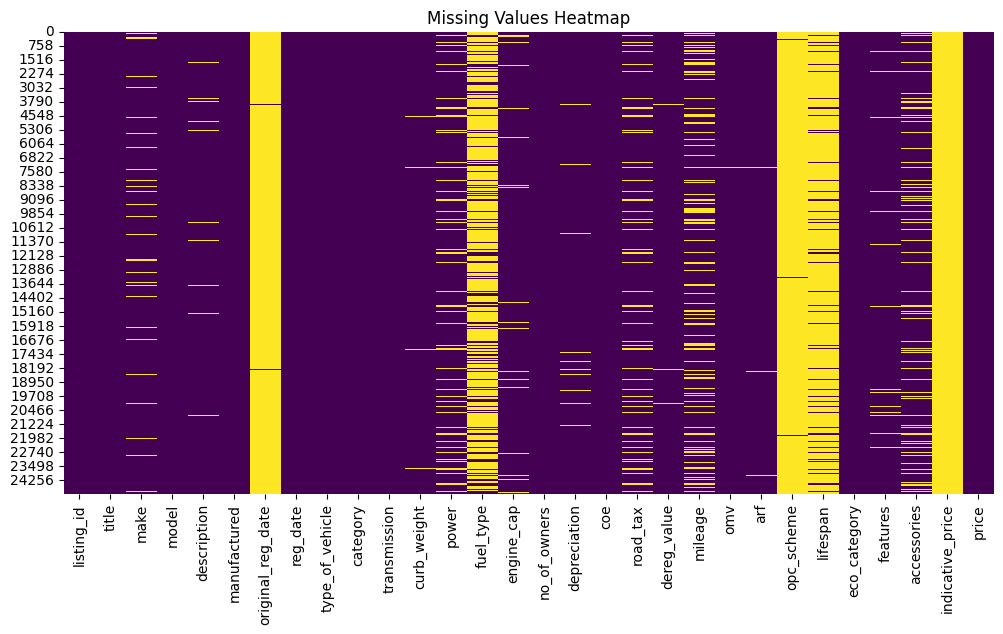

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


3.1 Numerical Characteristics

Data visualization analysis:

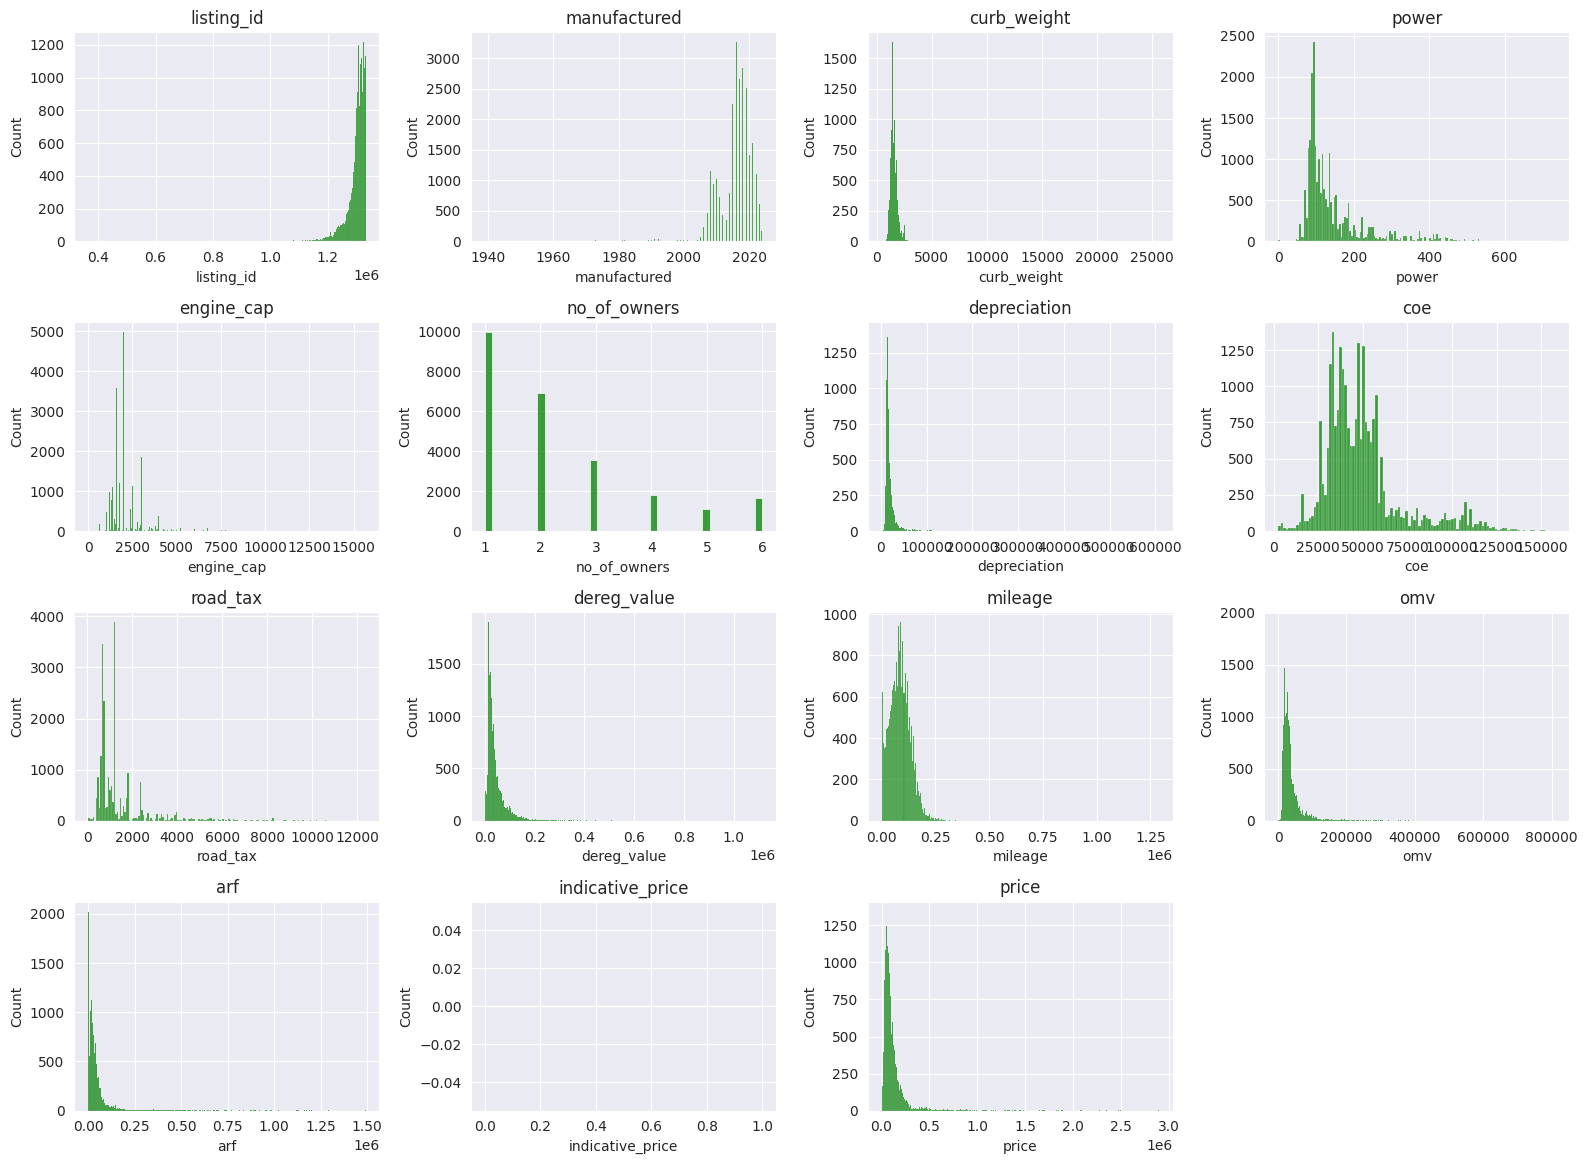

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 20))

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(7, 4, i)
    sns.histplot(data[col], color='Green')
    plt.title(col)

plt.tight_layout()
plt.show()


Plot histograms and box plots:

Column 'indicative_price' is empty after dropping NaNs.


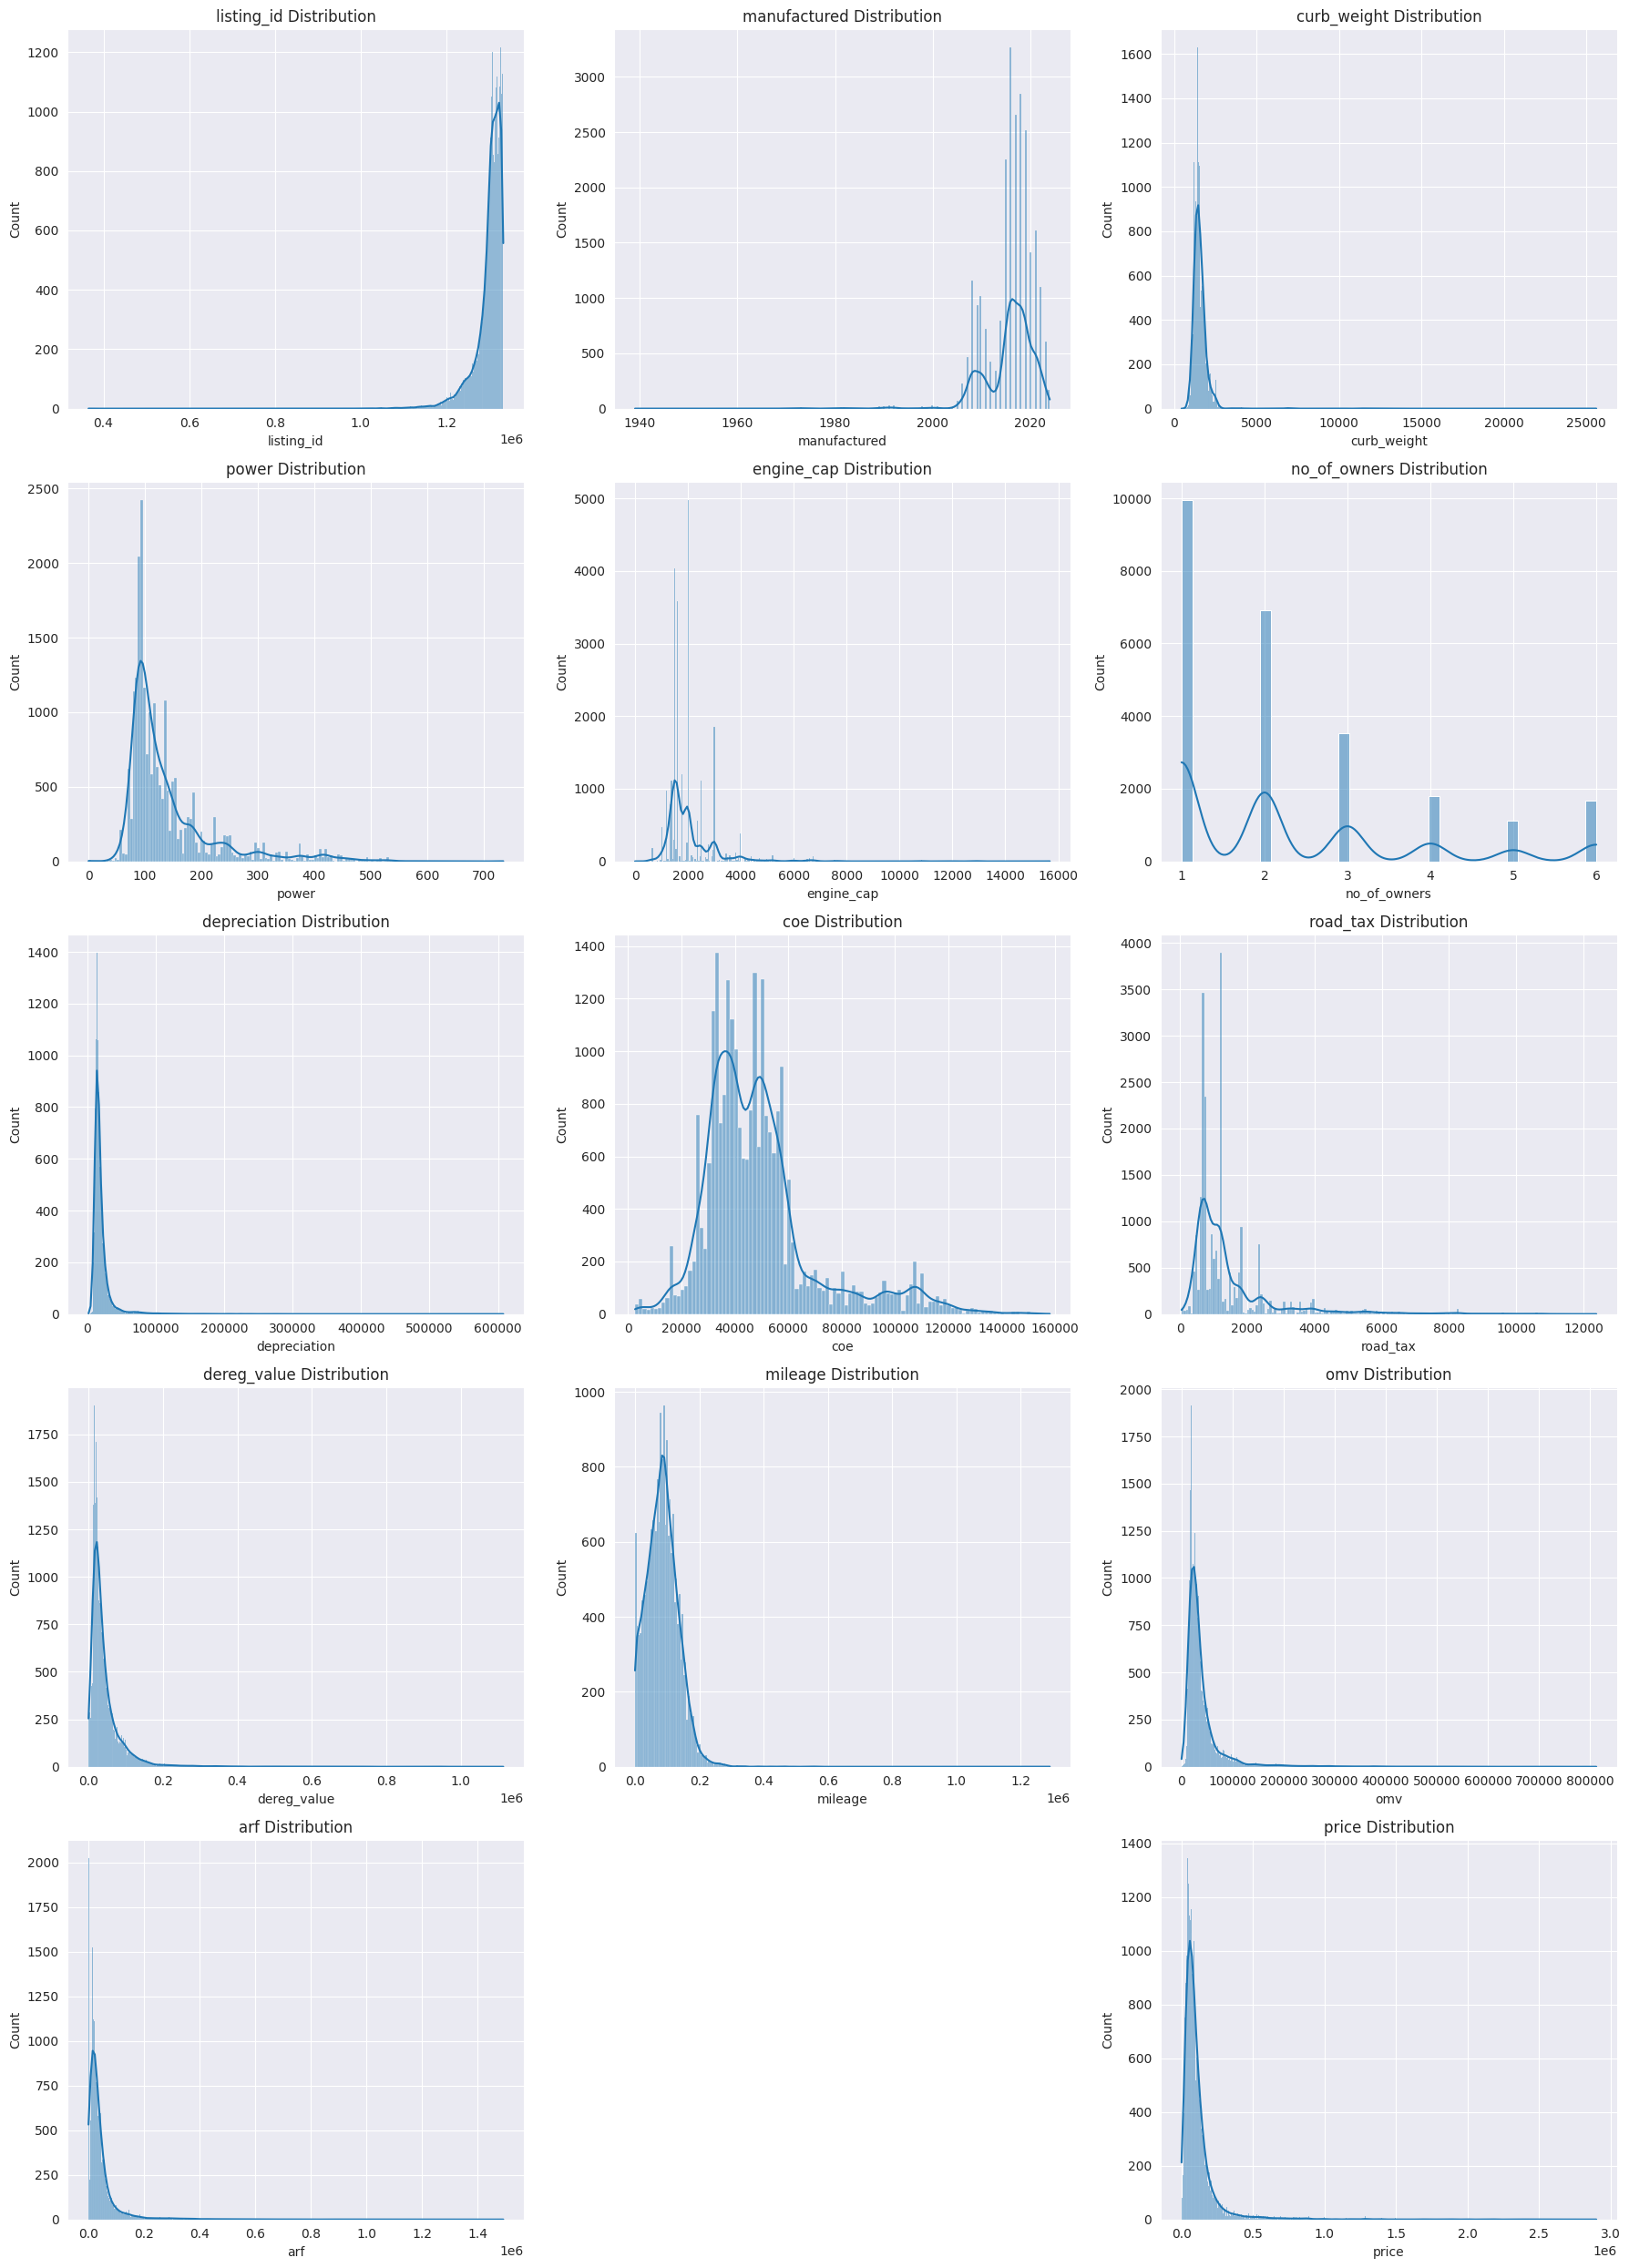

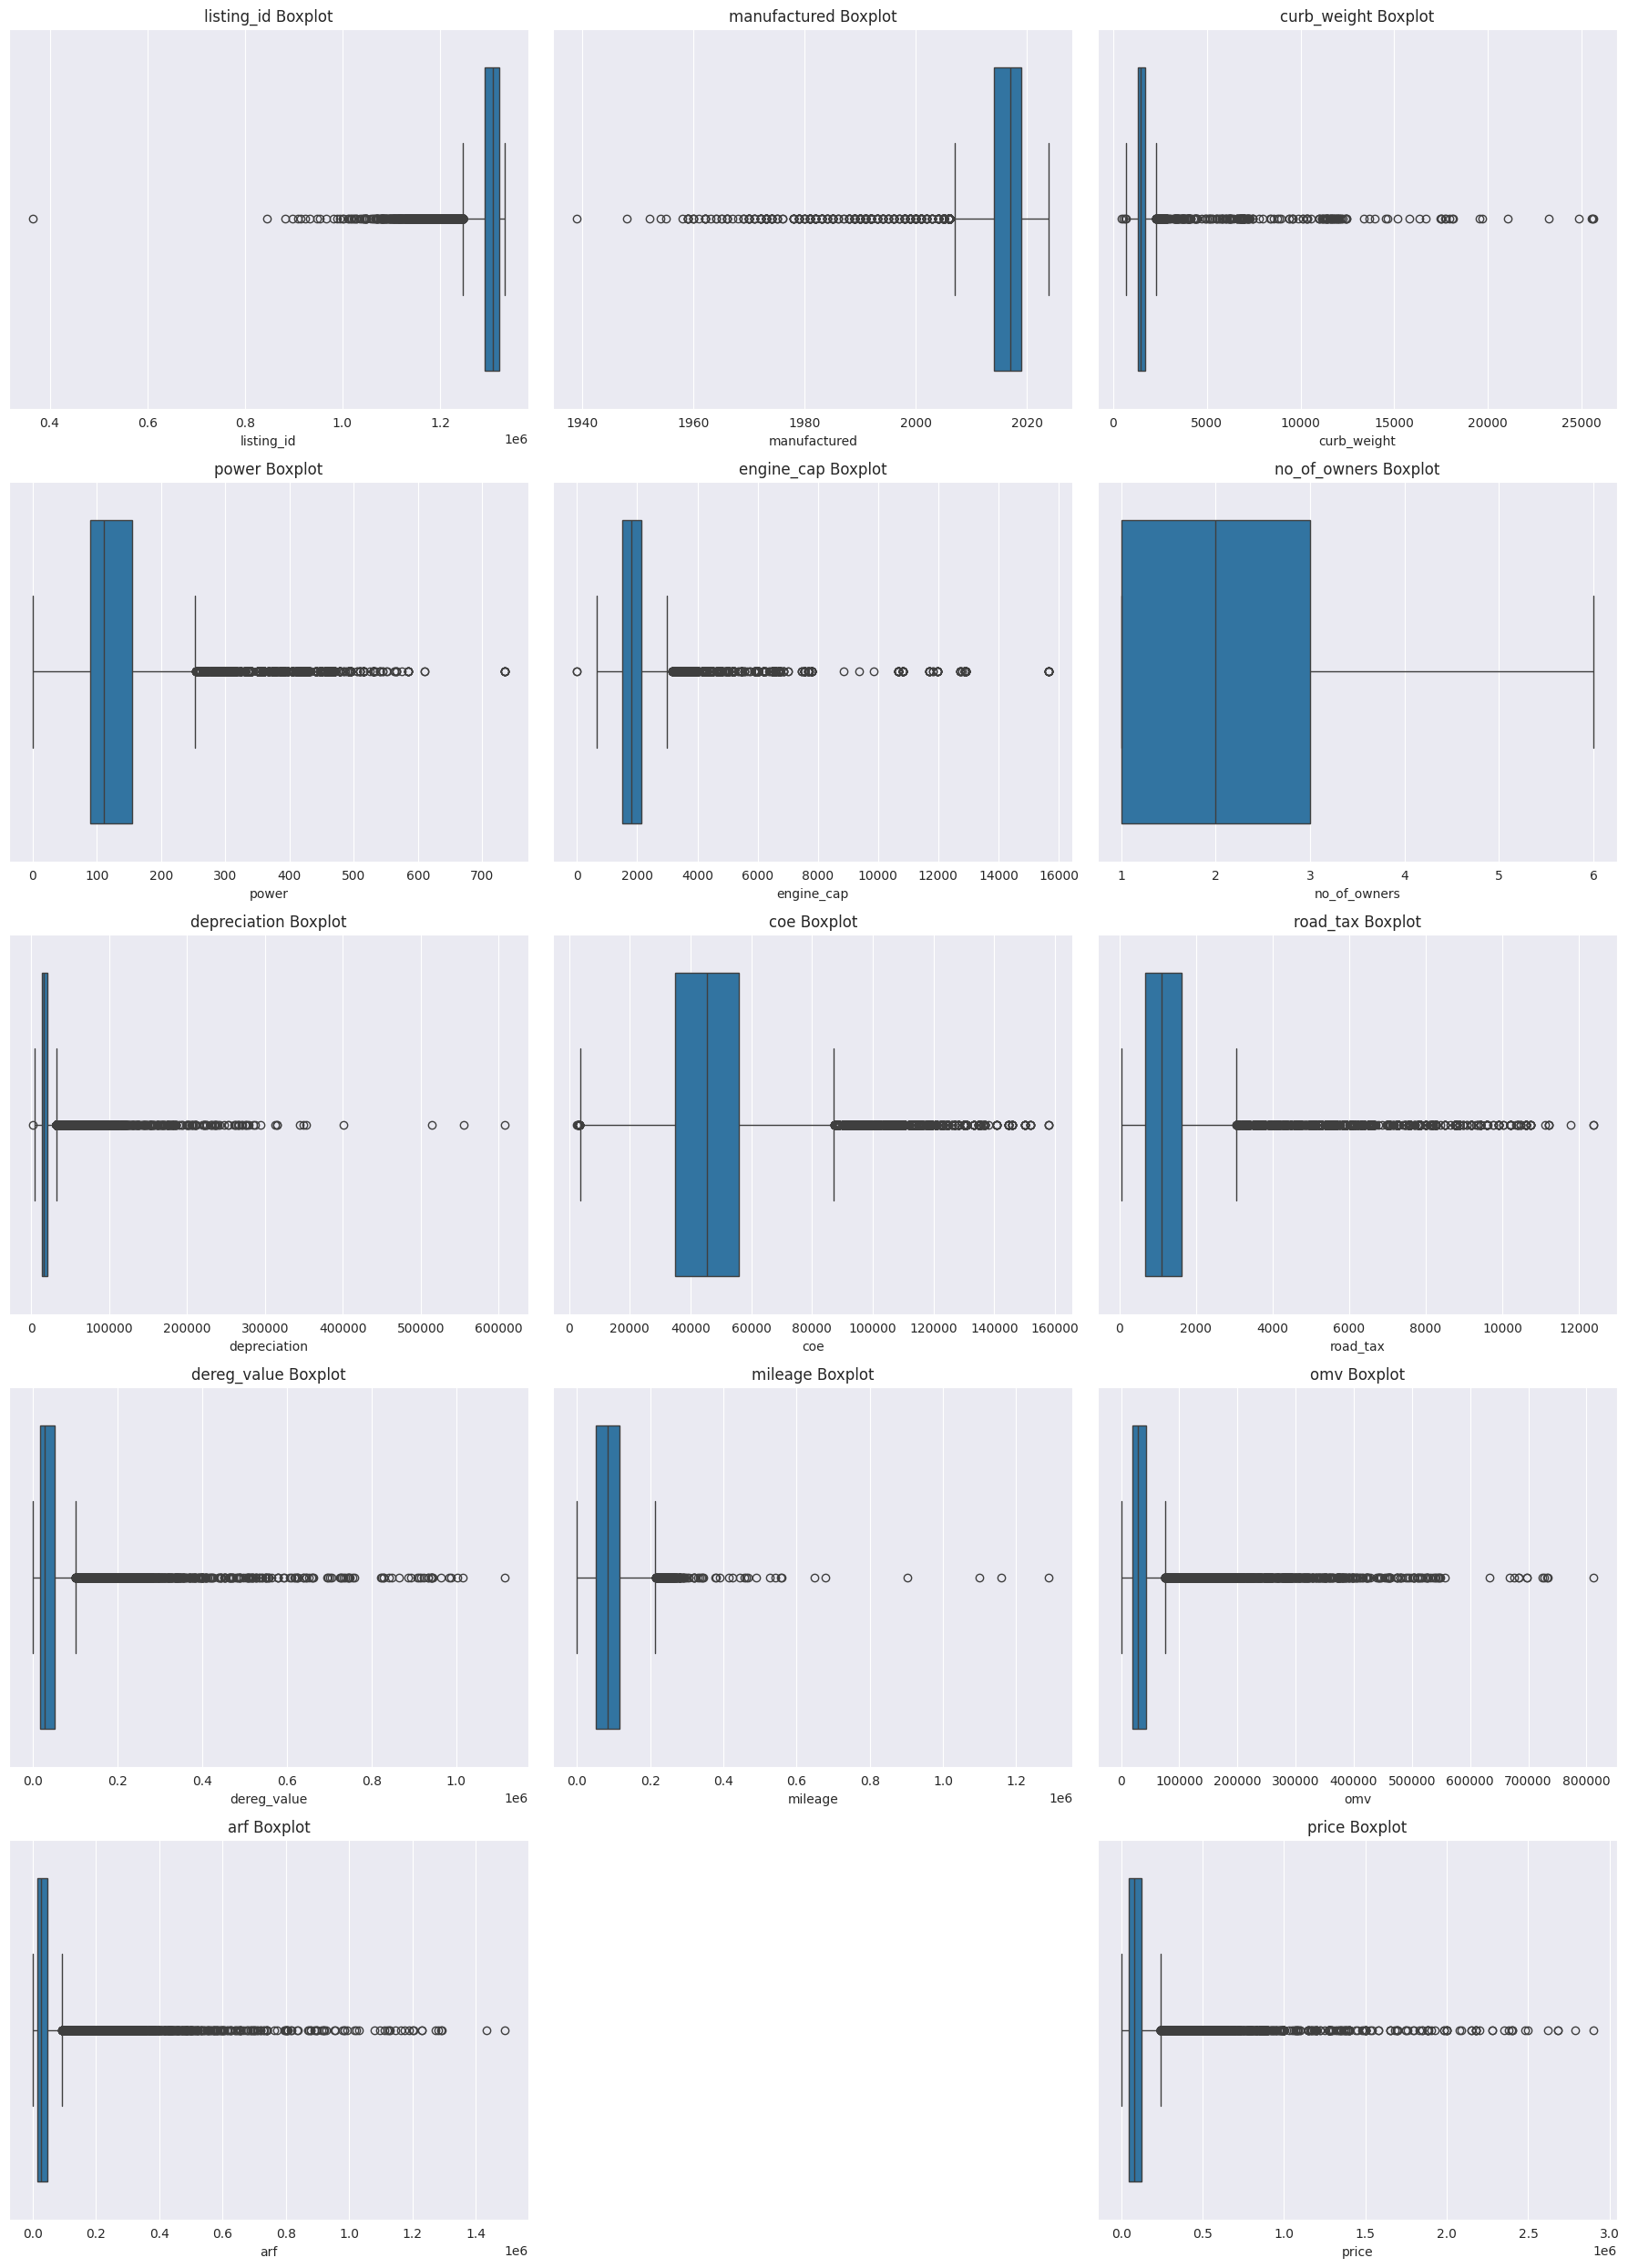

In [13]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

ncols = 3
n_distribution_rows = (len(numerical_features) // ncols) + (len(numerical_features) % ncols > 0)
n_boxplot_rows = n_distribution_rows

plt.figure(figsize=(18, n_distribution_rows * 5))
for i, col in enumerate(numerical_features, 1):
    col_data = data[col].dropna()

    if col_data.empty:
        print(f"Column '{col}' is empty after dropping NaNs.")
        continue

    plt.subplot(n_distribution_rows, ncols, i)
    sns.histplot(col_data, kde=True)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, n_boxplot_rows * 5))
for i, col in enumerate(numerical_features, 1):
    col_data = data[col].dropna()

    if col_data.empty:
        continue

    plt.subplot(n_boxplot_rows, ncols, i)
    sns.boxplot(x=col_data)
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

3.2 Classification Features

Draw a bar chart:

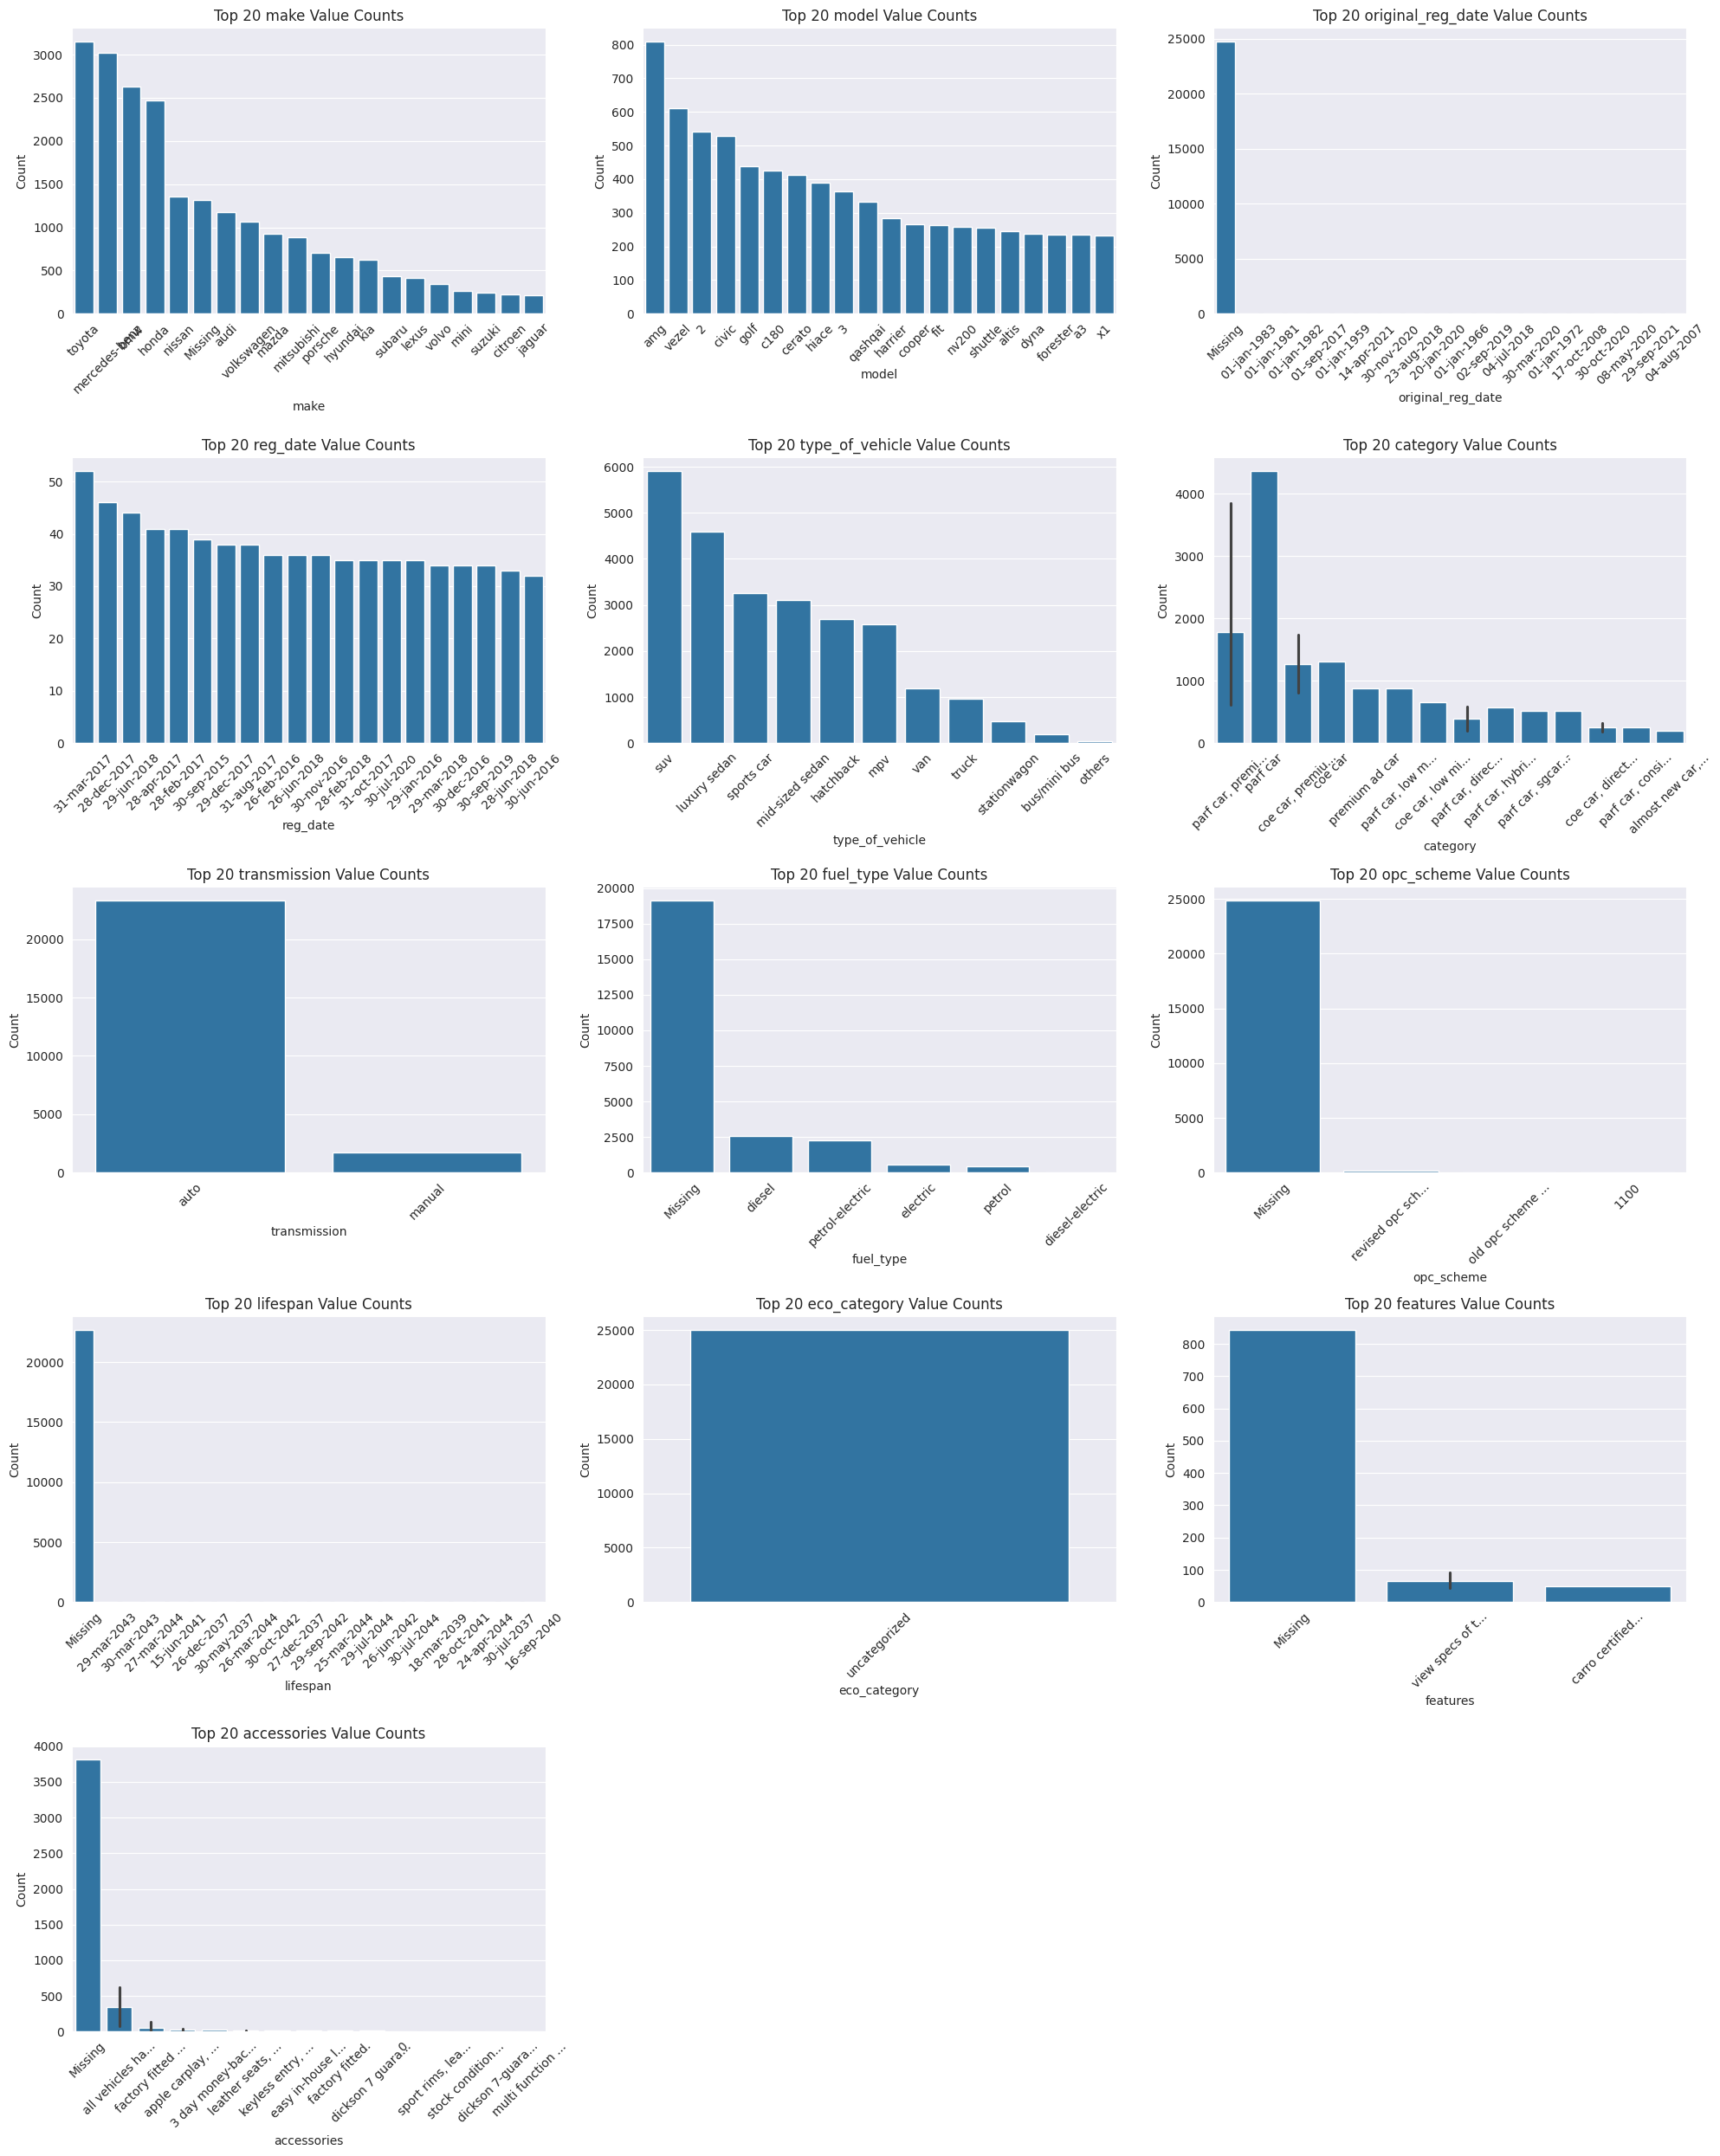

In [12]:
exclude_features = ['description', 'title']
categorical_features = [col for col in data.select_dtypes(include=['object']).columns if col not in exclude_features]

num_plots = len(categorical_features)
ncols = 3
nrows = (num_plots // ncols) + (num_plots % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, nrows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    data[col] = data[col].fillna('Missing')

    top_categories = data[col].value_counts().nlargest(20)

    truncated_labels = [label[:15] + "..." if len(label) > 15 else label for label in top_categories.index]

    sns.barplot(x=truncated_labels, y=top_categories.values, ax=axes[i])
    axes[i].set_title(f'Top 20 {col} Value Counts')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

4.1 Relationship between numerical features and target variables

To draw a scatter plot:

Target variable 'price' exists in the dataset.


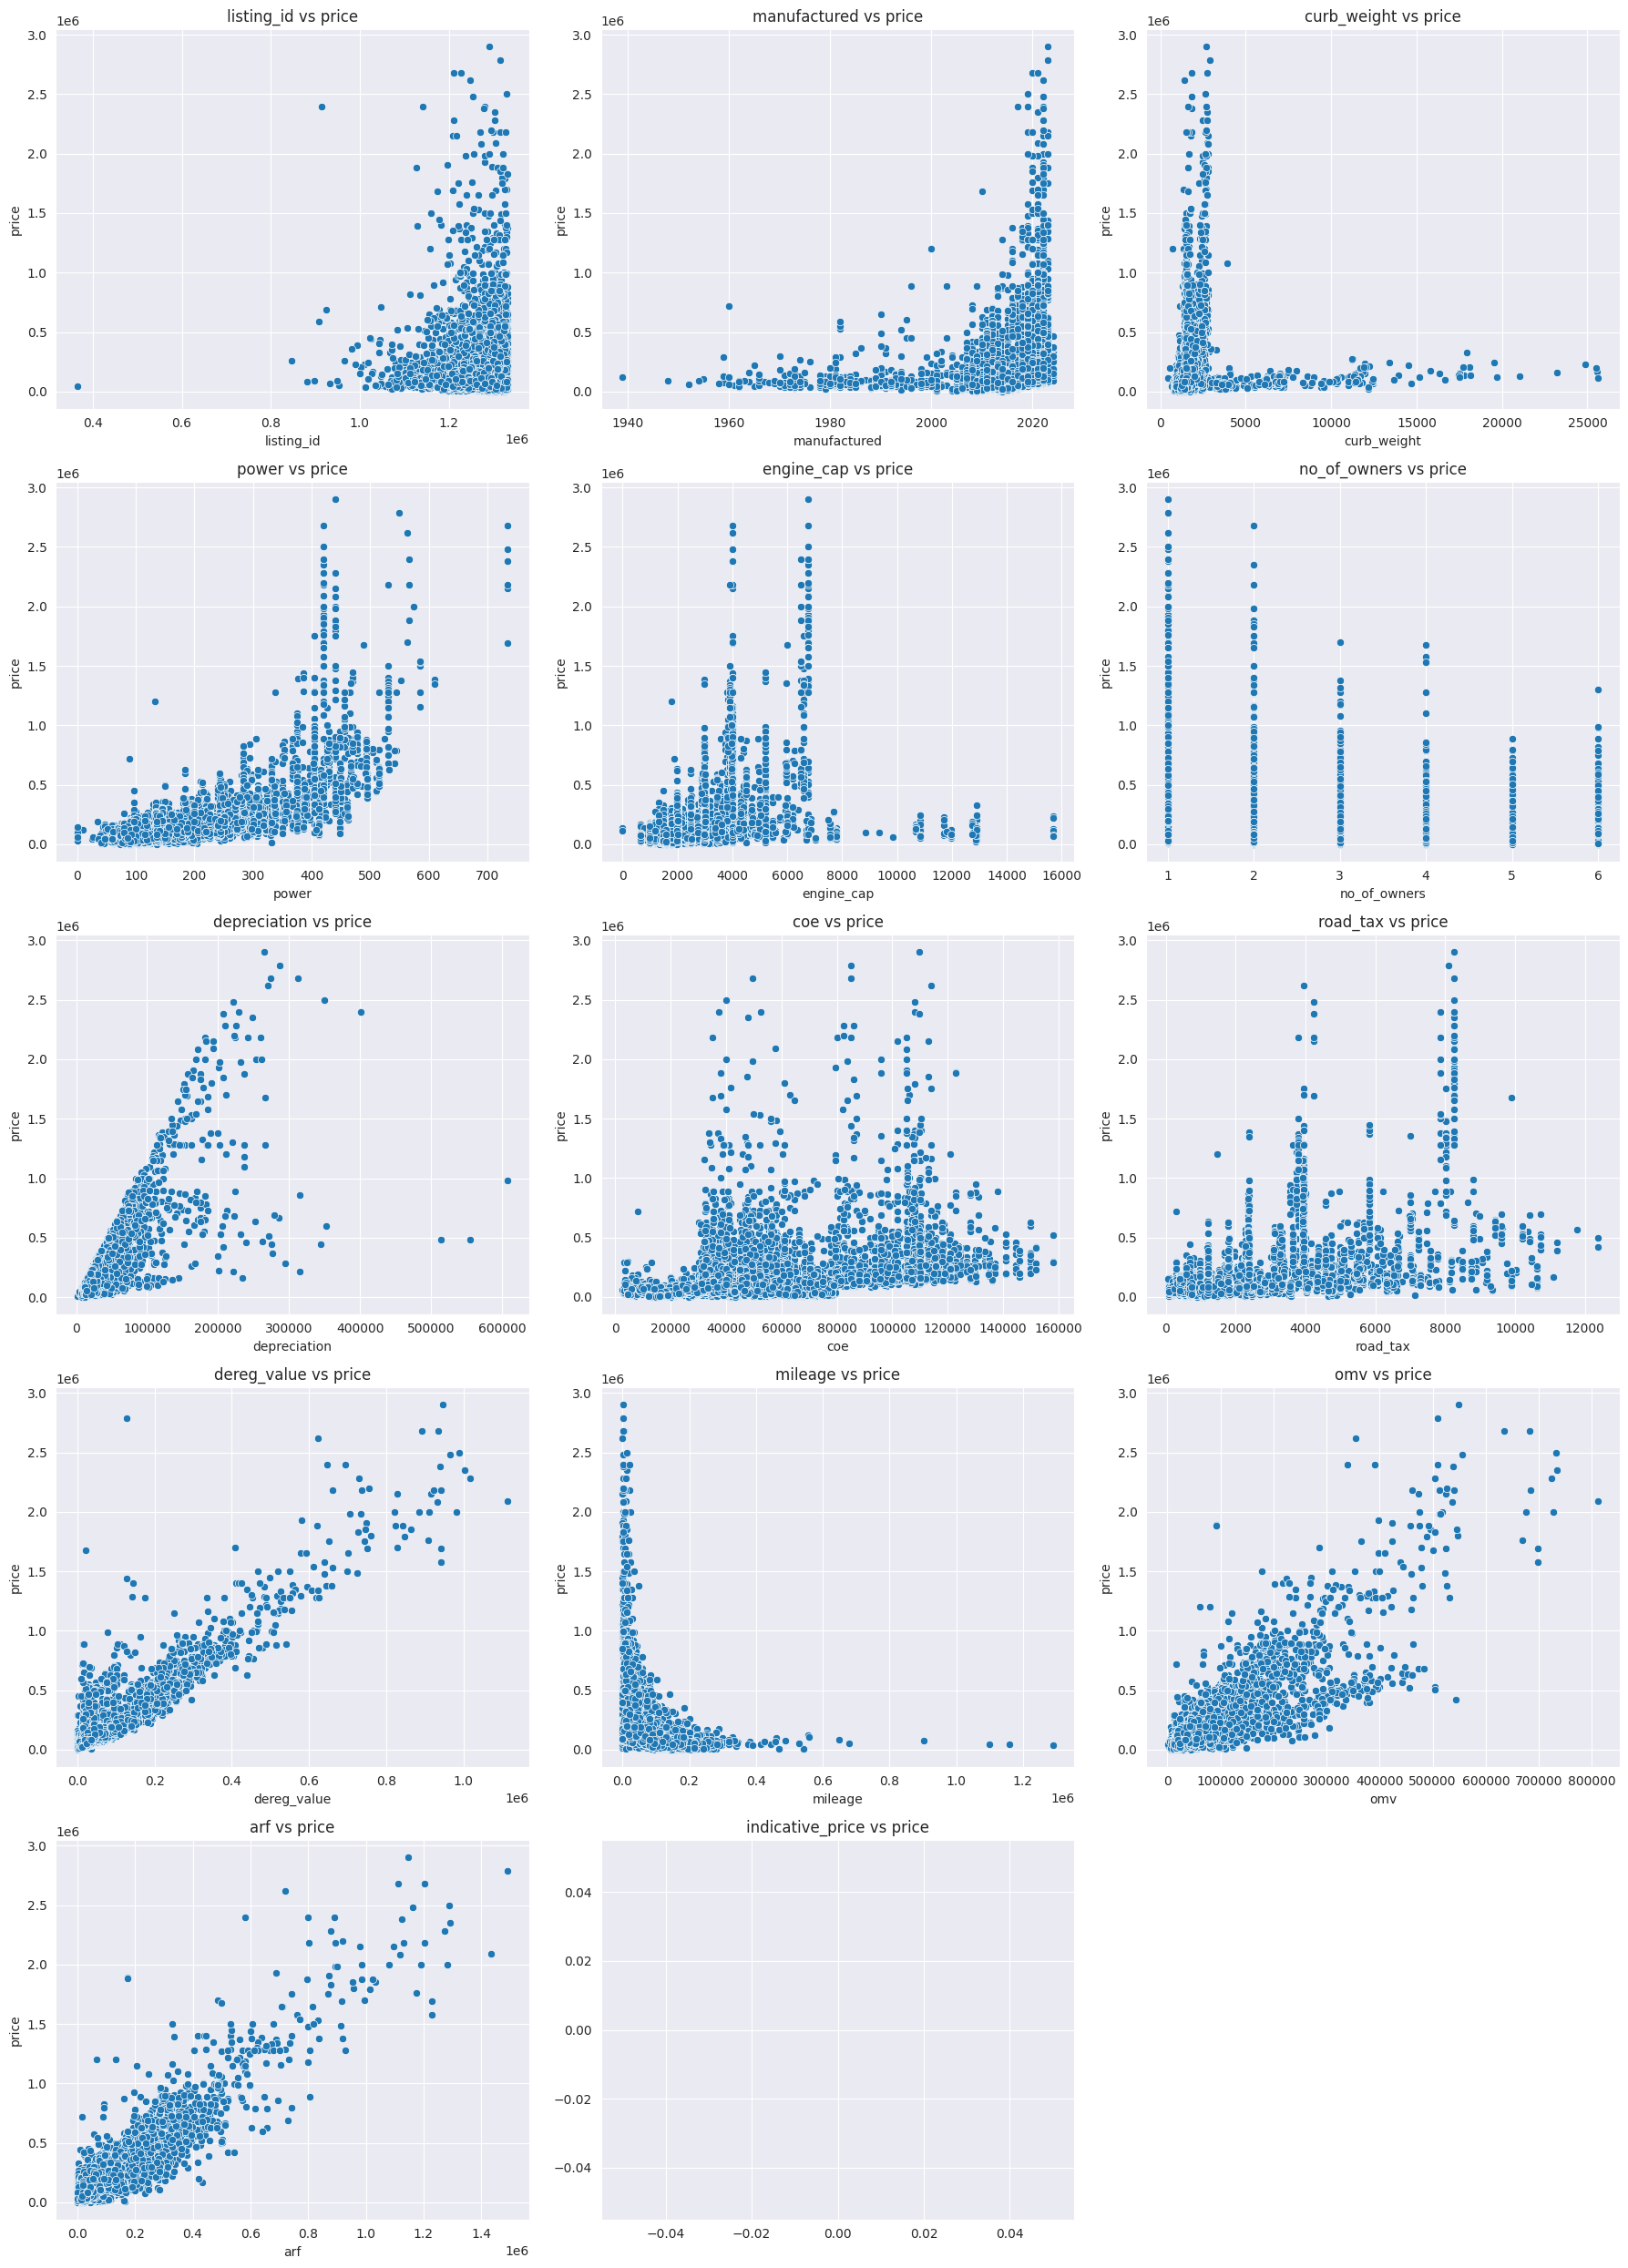

In [14]:
target = 'price'

if target in data.columns:
    print(f"Target variable '{target}' exists in the dataset.")
else:
    print(f"Target variable '{target}' does not exist in the dataset. Please check the column name.")

if data[target].dtype not in ['int64', 'float64']:
    data[target] = data[target].astype(str)
    data[target] = data[target].str.replace(',', '').str.replace('$', '').astype(float)

missing_price = data[target].isnull().sum()
if missing_price > 0:
    data = data.dropna(subset=[target])

numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target in numerical_features:
    numerical_features.remove(target)

ncols = 3
nrows = (len(numerical_features) // ncols) + (len(numerical_features) % ncols > 0)  # 计算行数
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.scatterplot(x=data[col], y=data[target], ax=axes[i])
    axes[i].set_title(f'{col} vs {target}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

4.2 Relationship between classification features and target variables

To draw a box diagram:

<ipython-input-16-35043056f562>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-35043056f562>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-35043056f562>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-35043056f562>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
<ipython-input-16-35043056f562>:

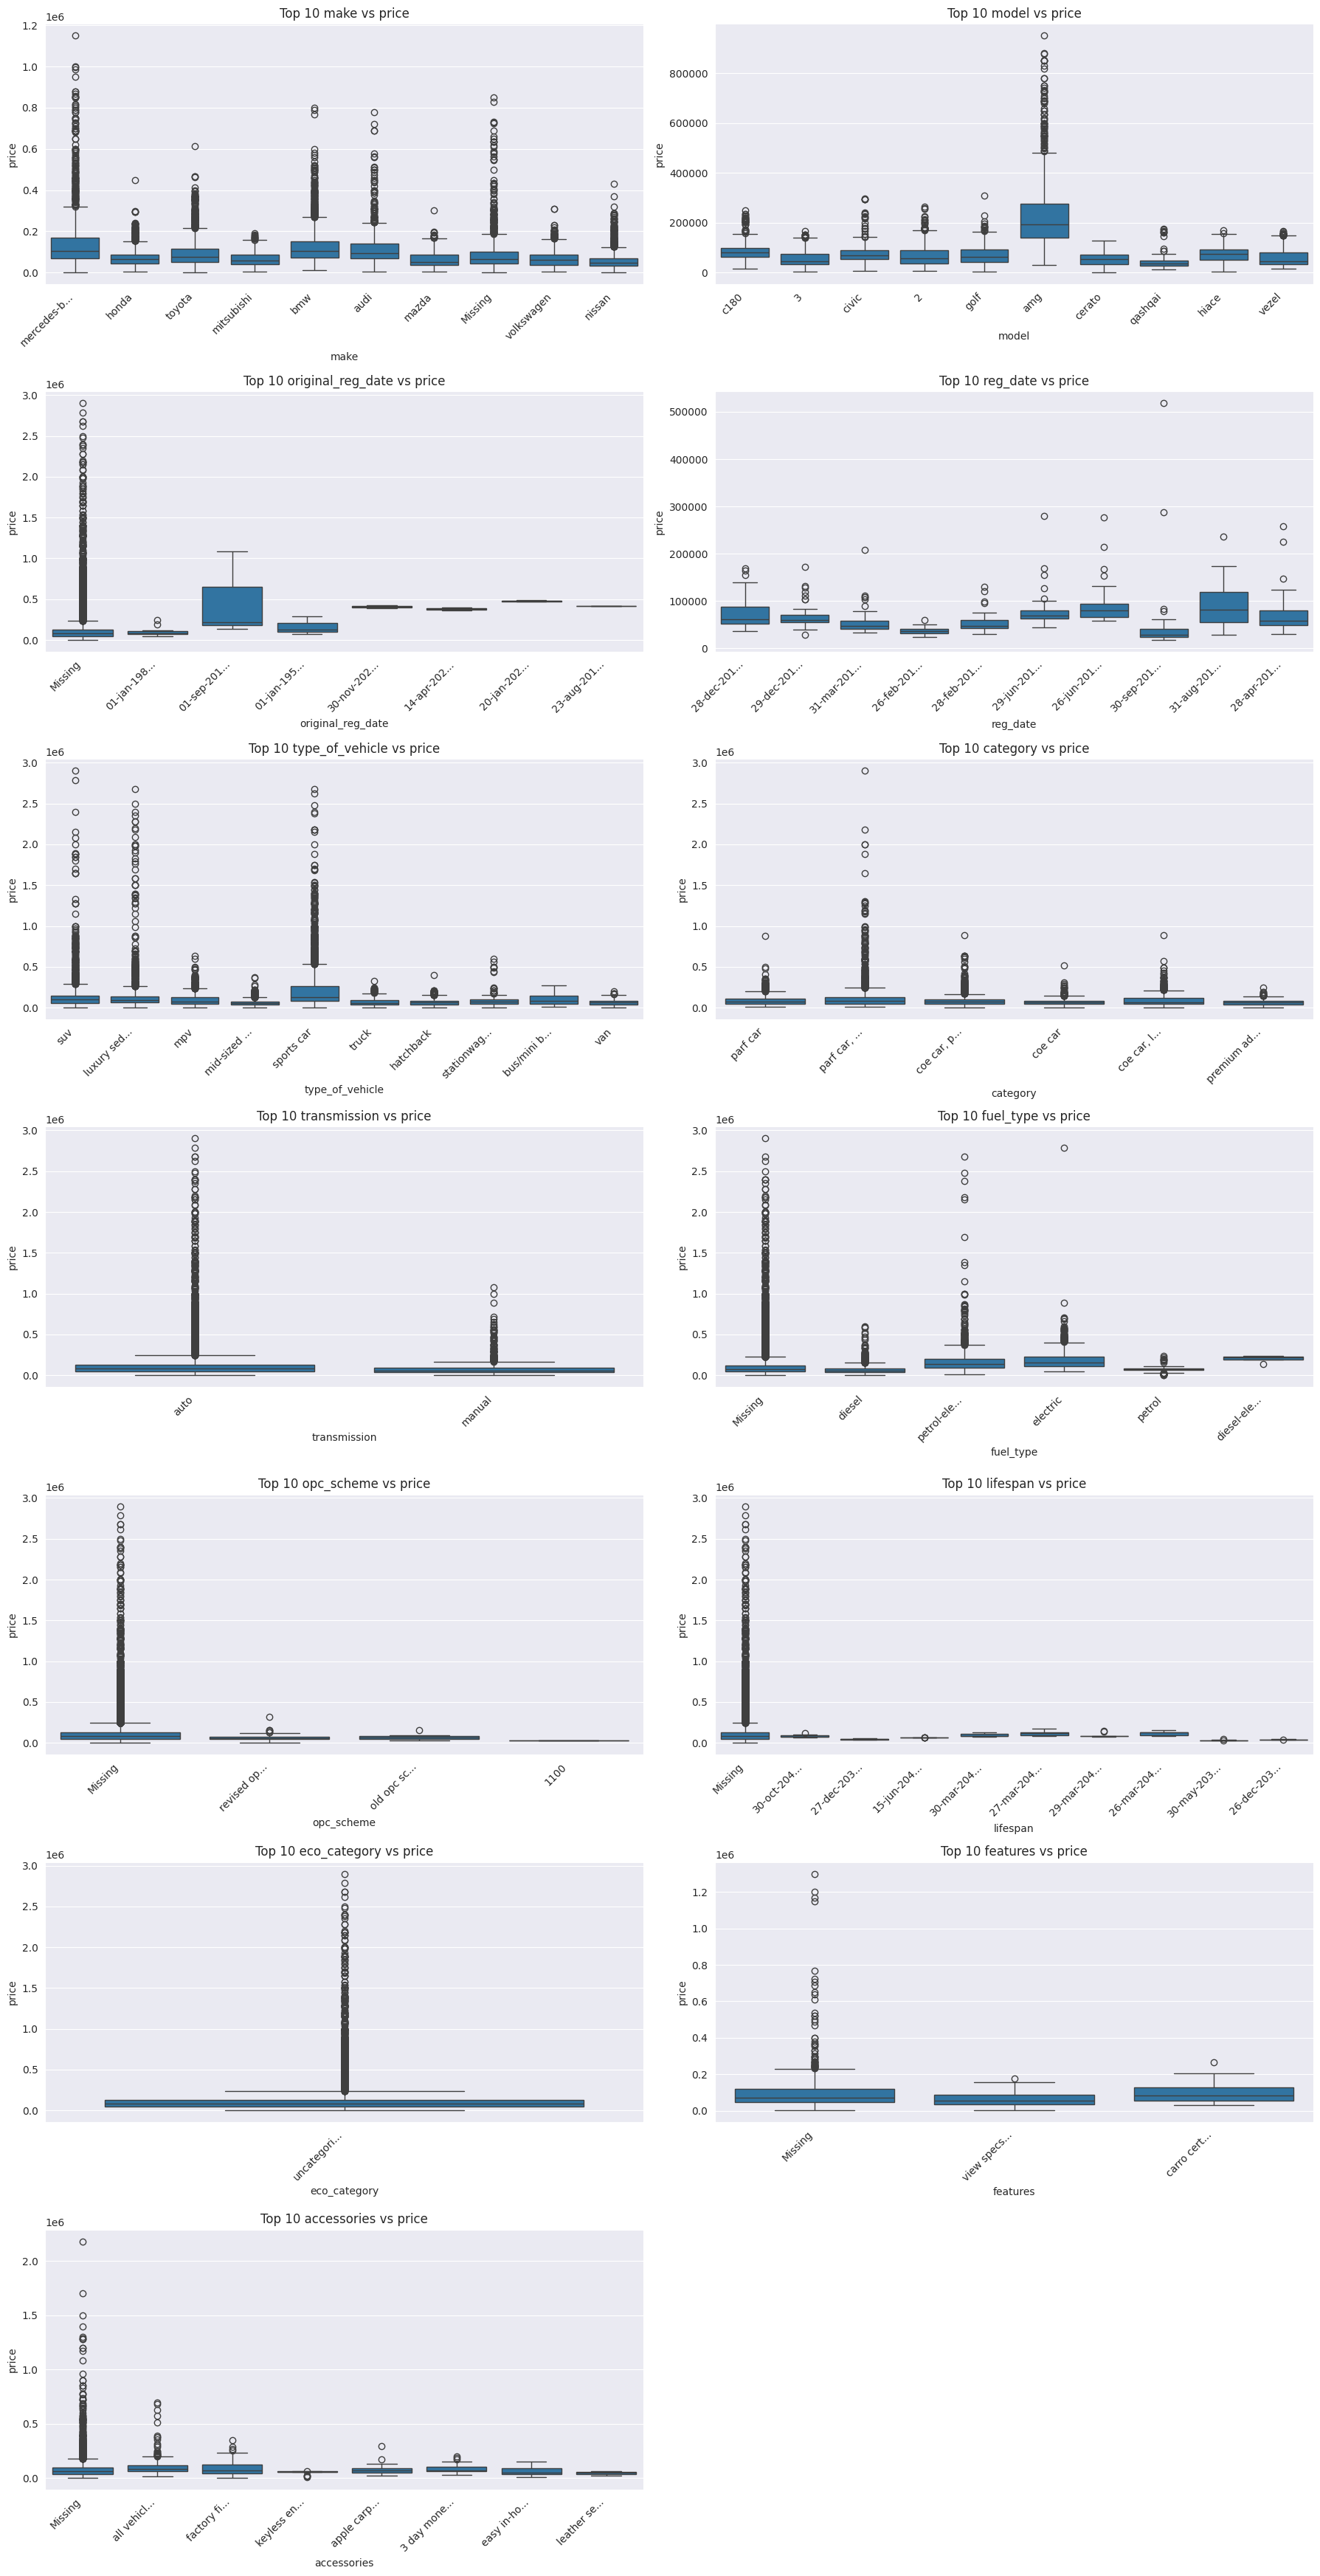

In [16]:
top_n = 10
ncols = 2
nrows = (len(categorical_features) // ncols) + (len(categorical_features) % ncols > 0)  # 计算行数

fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    top_categories = data[col].value_counts().index[:top_n]
    data_subset = data[data[col].isin(top_categories)]

    data_subset = data[data[col].isin(top_categories)].copy()
    data_subset[col] = data_subset[col].apply(lambda x: str(x)[:10] + "..." if len(str(x)) > 10 else x)

    sns.boxplot(x=data_subset[col], y=data_subset[target], ax=axes[i])
    axes[i].set_title(f'Top {top_n} {col} vs {target}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

4.3 Correlation analysis

Calculate the correlation matrix and draw a heat map:




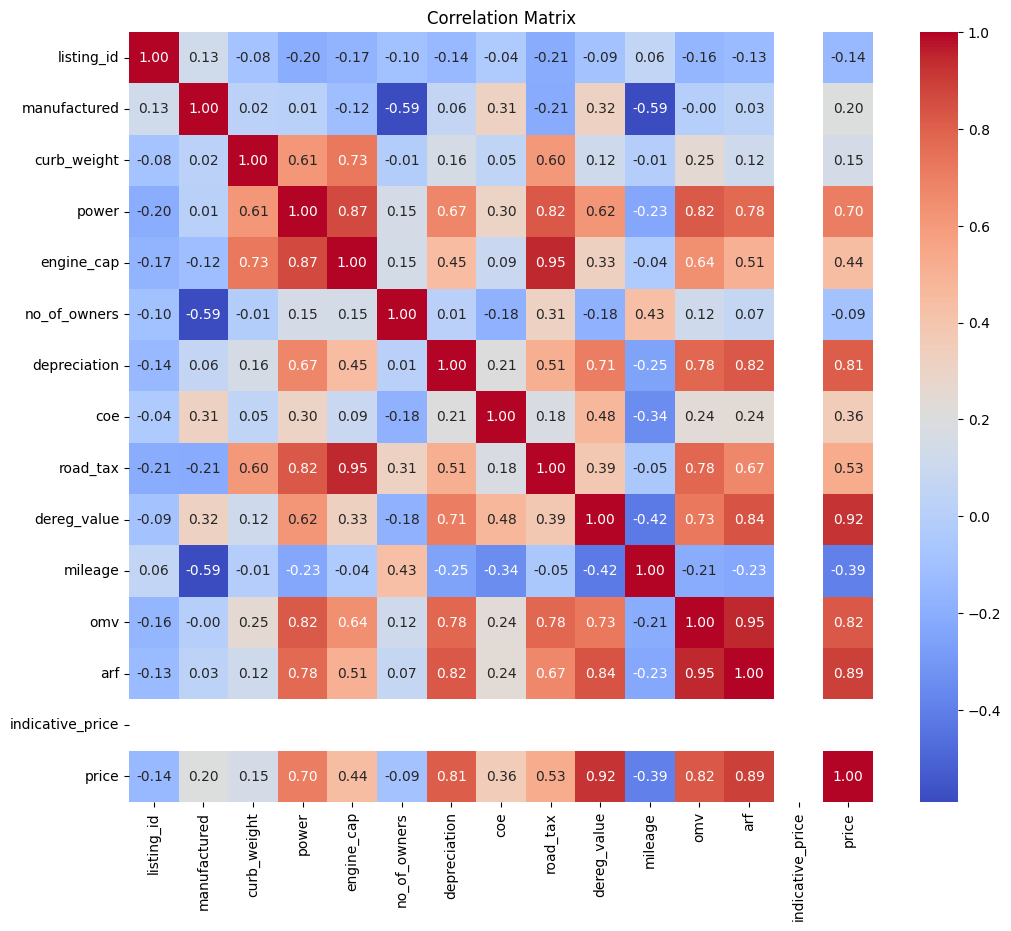

In [ ]:
import numpy as np

numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


5.1 Outlier Detection

Using box plots and Z-Score methods:

Processing column: listing_id
listing_id Number of outliers: 452
Processing column: manufactured
manufactured Number of outliers: 311
Processing column: curb_weight
curb_weight Number of outliers: 169
Processing column: power
power Number of outliers: 697
Processing column: engine_cap
engine_cap Number of outliers: 400
Processing column: no_of_owners
no_of_owners Number of outliers: 0
Processing column: depreciation
depreciation Number of outliers: 393
Processing column: coe
coe Number of outliers: 455
Processing column: road_tax
road_tax Number of outliers: 582
Processing column: dereg_value
dereg_value Number of outliers: 389
Processing column: mileage
mileage Number of outliers: 104
Processing column: omv
omv Number of outliers: 528
Processing column: arf
arf Number of outliers: 491
Processing column: indicative_price
Column 'indicative_price' has insufficient data to plot a boxplot.
Processing column: price
price Number of outliers: 426


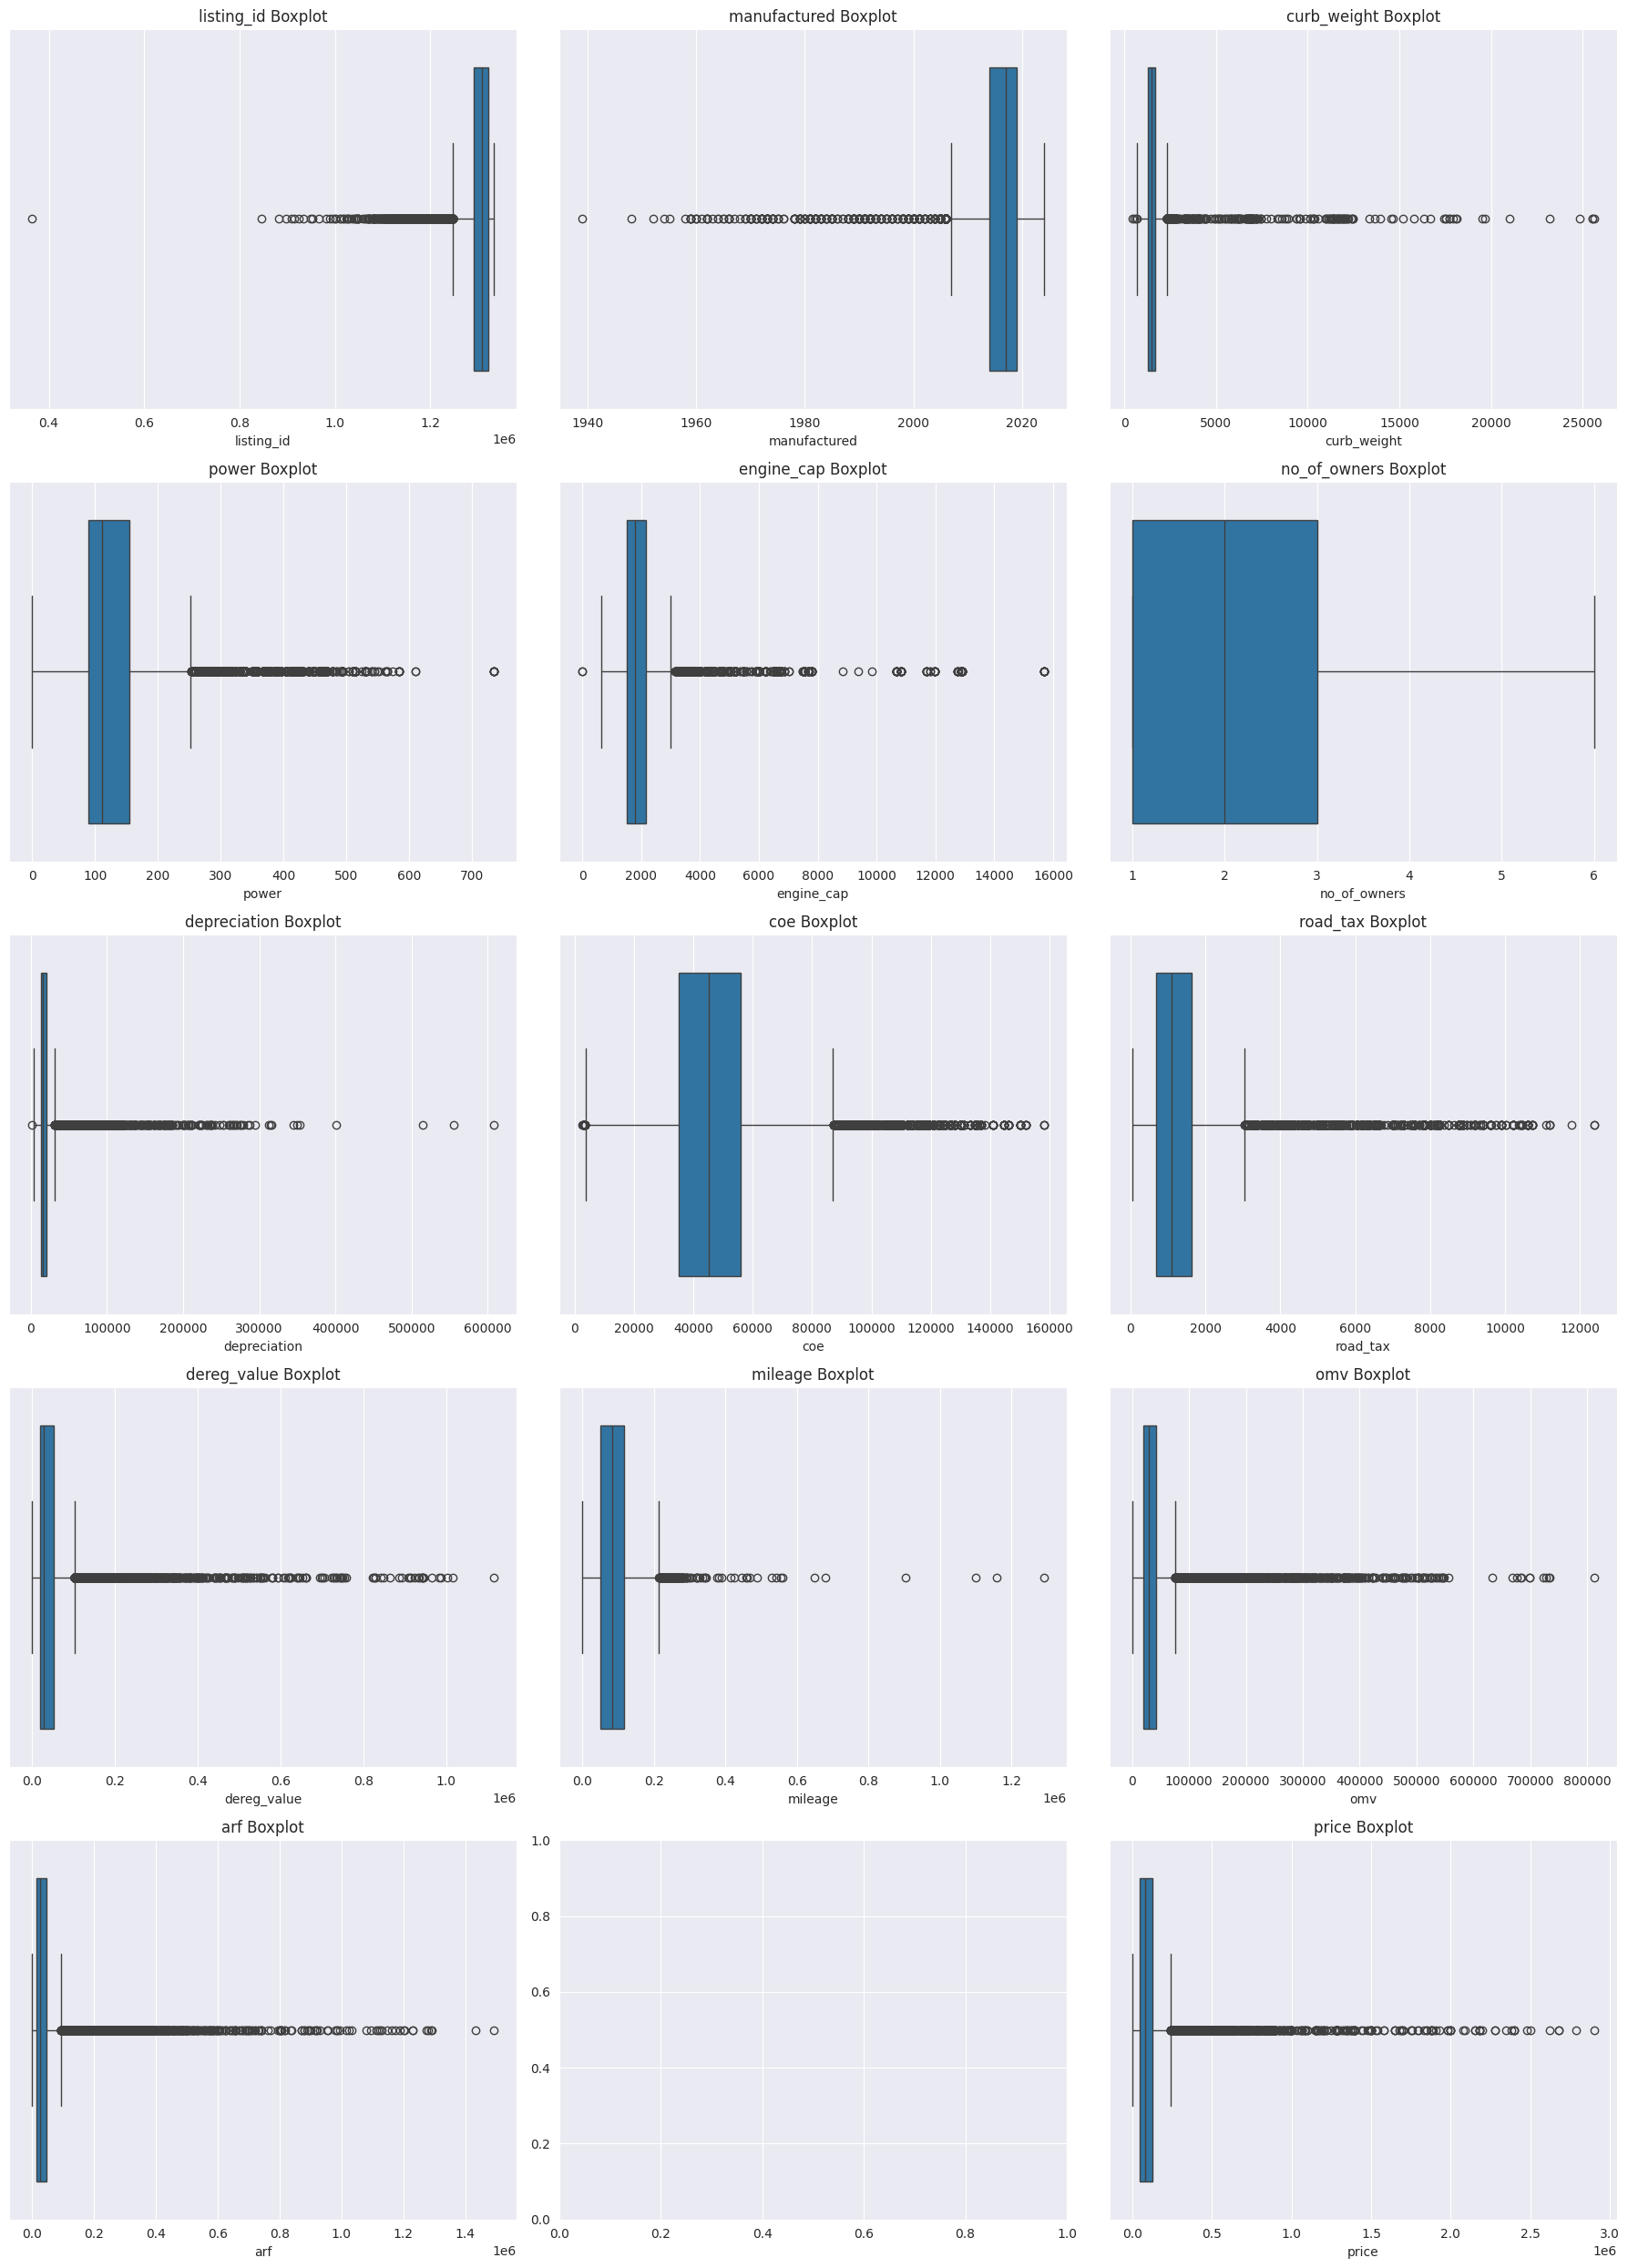

In [17]:
from scipy import stats

numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

ncols = 3
nrows = (len(numerical_features) // ncols) + (len(numerical_features) % ncols > 0)  # 计算行数
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    print(f"Processing column: {col}")

    col_data = data[col].dropna()

    if not np.issubdtype(col_data.dtype, np.number):
        try:
            col_data = col_data.astype(str).str.replace(',', '').str.replace('$', '')
            col_data = col_data.replace('', np.nan).dropna()
            col_data = col_data.astype(float)
        except Exception as e:
            print(f"Column '{col}' cannot be converted to numeric due to error: {e}")
            continue

    if col_data.empty or col_data.nunique() <= 1:
        print(f"Column '{col}' has insufficient data to plot a boxplot.")
        continue

    sns.boxplot(x=col_data, ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')

    z_scores = np.abs(stats.zscore(col_data))
    z_scores = pd.Series(z_scores, index=col_data.index)
    outliers = col_data[z_scores > 3]
    print(f"{col} Number of outliers: {len(outliers)}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


5.2 Handling Outliers

Select Delete or fix outliers:

In [18]:
data = data[(np.abs(stats.zscore(data[numerical_features])) < 4).any(axis=1)]


In [19]:
data.shape


(25000, 30)

In [20]:
data.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
0,1292132,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",2018.0,Missing,08-mar-2018,suv,parf car,...,96000.0,88906.0,132031.0,Missing,Missing,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,Missing,28-dec-2017,luxury sedan,"parf car, premium ad car",...,85680.0,40678.0,43950.0,Missing,Missing,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0
2,1311717,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,2007.0,Missing,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,138000.0,27994.0,30794.0,Missing,Missing,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0
3,1310068,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,2008.0,Missing,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,160000.0,16084.0,16084.0,Missing,Missing,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0
4,1325280,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,2006.0,Missing,22-dec-2006,luxury sedan,"coe car, premium ad car",...,183000.0,50414.0,55456.0,Missing,Missing,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0


6.1 Conversion of numerical features

Handling skew distribution:




In [ ]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

numerical_features = data.select_dtypes(include=[float, int]).columns

skewness = data[numerical_features].skew().sort_values(ascending=False)
skew_threshold = 0.5
skewed_features = skewness[abs(skewness) > skew_threshold].index.tolist()
print("Skewed features before transformation:", skewed_features)

if skewed_features:
    pt = PowerTransformer(method='yeo-johnson')
    data[skewed_features] = pt.fit_transform(data[skewed_features])

    new_skewness = data[skewed_features].skew().sort_values(ascending=False)
    print("Skewness after transformation:")
    print(new_skewness)
else:
    print("No skewed features found for transformation.")


Skewed features before transformation: ['curb_weight', 'depreciation', 'price', 'arf', 'dereg_value', 'omv', 'engine_cap', 'road_tax', 'mileage', 'power', 'coe', 'no_of_owners', 'manufactured', 'listing_id']
Skewness after transformation:
no_of_owners    0.174679
coe             0.067923
dereg_value     0.044990
arf             0.039993
mileage        -0.022091
price          -0.026963
power          -0.078745
road_tax       -0.096583
engine_cap     -0.137665
curb_weight    -0.181194
omv            -0.243738
depreciation   -0.269624
listing_id     -0.466639
manufactured   -1.517765
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [ ]:
data.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
0,-0.606888,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",0.423747,Missing,08-mar-2018,suv,parf car,...,0.317115,1.555837,1.545618,Missing,Missing,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,1.110712
1,-0.510616,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,0.212063,Missing,28-dec-2017,luxury sedan,"parf car, premium ad car",...,0.127632,0.532033,0.502760,Missing,Missing,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,0.257379
2,0.259049,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,-1.660189,Missing,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,1.015871,-0.083413,0.193326,Missing,Missing,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,-0.886588
3,0.173450,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,-1.491542,Missing,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,1.347272,-1.184636,-0.339340,Missing,Missing,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,-0.730848
4,1.070558,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,-1.825035,Missing,22-dec-2006,luxury sedan,"coe car, premium ad car",...,1.674738,0.845781,0.712133,Missing,Missing,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,-1.466279


6.2 Feature Scaling

Standardization or normalization:

In [ ]:
print("Data shape:", data.shape)
print("Numerical features shape:", data[numerical_features].shape)
print("First few rows of data:")
print(data.head())


Data shape: (25000, 30)
Numerical features shape: (25000, 15)
First few rows of data:
   listing_id                                              title  \
0   -0.606888  Land Rover Range Rover Velar 3.0A Si6 R-Dynami...   
1   -0.510616   Mercedes-Benz C-Class C200 Sport Premium Sunroof   
2    0.259049              Honda Odyssey 2.4A (COE till 09/2027)   
3    0.173450       Toyota Corolla Altis 1.6A (COE till 12/2028)   
4    1.070558                     Lexus GS300 (COE till 06/2026)   

            make    model                                        description  \
0     land rover    range  1 owner, no repairs needed! it looks great, in...   
1  mercedes-benz     c200  rare beautiful white c200 sport premium sunroo...   
2          honda  odyssey            comes with warranty. full service done.   
3         toyota    altis                                                  0   
4          lexus       gs  wear and tear done up. well maintained and reg...   

   manufactured original

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = [col for col in numerical_features if col in data.columns]

print("Data shape:", data.shape)
print("Numerical features:", numerical_features)
scaler = MinMaxScaler()

data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("Normalized data sample:")
print(data[numerical_features].head())
print("Min values after normalization:\n", data[numerical_features].min())
print("Max values after normalization:\n", data[numerical_features].max())


Data shape: (25000, 30)
Numerical features: ['listing_id', 'manufactured', 'curb_weight', 'power', 'engine_cap', 'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value', 'mileage', 'omv', 'arf', 'indicative_price', 'price']
Normalized data sample:
   listing_id  manufactured  curb_weight     power  engine_cap  no_of_owners  \
0    0.460136      0.850275     0.807022  0.873156    0.858044      0.456679   
1    0.483643      0.827240     0.742376  0.773597    0.821383      0.456679   
2    0.671576      0.623504     0.774836  0.754897    0.836501      0.690650   
3    0.650675      0.641856     0.675359  0.700348    0.801361      0.690650   
4    0.869727      0.605565     0.776703  0.815490    0.858044      1.000000   

   depreciation       coe  road_tax  dereg_value   mileage       omv  \
0      0.939155  0.616274  0.819270     0.728367  0.210345  0.927786   
1      0.902566  0.610270  0.721631     0.643127  0.196458  0.882475   
2      0.839013  0.629845  0.822653     0.5423

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


7.1 One-Hot Encoding

In [ ]:
data.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
0,0.460136,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",0.850275,Missing,08-mar-2018,suv,parf car,...,0.210345,0.927786,0.658887,Missing,Missing,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,0.726320
1,0.483643,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,0.827240,Missing,28-dec-2017,luxury sedan,"parf car, premium ad car",...,0.196458,0.882475,0.533410,Missing,Missing,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,0.648916
2,0.671576,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,0.623504,Missing,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,0.261556,0.855237,0.496179,Missing,Missing,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,0.545149
3,0.650675,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,0.641856,Missing,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,0.285844,0.806499,0.432088,Missing,Missing,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,0.559276
4,0.869727,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,0.605565,Missing,22-dec-2006,luxury sedan,"coe car, premium ad car",...,0.309844,0.896361,0.558602,Missing,Missing,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,0.492567


Handling unordered categorical variables:


In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print("Categorical features:", categorical_features)

one_hot_features = []
for col in categorical_features:
    unique_count = data[col].nunique()

    if unique_count <= 10:
        one_hot_features.append(col)

print("Features for One-Hot Encoding:", one_hot_features)


Categorical features: ['title', 'make', 'model', 'description', 'original_reg_date', 'reg_date', 'type_of_vehicle', 'category', 'transmission', 'fuel_type', 'opc_scheme', 'lifespan', 'eco_category', 'features', 'accessories']
Features for One-Hot Encoding: ['transmission', 'fuel_type', 'opc_scheme', 'eco_category']


In [ ]:
data = pd.get_dummies(data, columns=one_hot_features, drop_first=True)

print("Data after One-Hot Encoding:")
print(data.head())

Data after One-Hot Encoding:
   listing_id                                              title  \
0    0.460136  Land Rover Range Rover Velar 3.0A Si6 R-Dynami...   
1    0.483643   Mercedes-Benz C-Class C200 Sport Premium Sunroof   
2    0.671576              Honda Odyssey 2.4A (COE till 09/2027)   
3    0.650675       Toyota Corolla Altis 1.6A (COE till 12/2028)   
4    0.869727                     Lexus GS300 (COE till 06/2026)   

            make    model                                        description  \
0     land rover    range  1 owner, no repairs needed! it looks great, in...   
1  mercedes-benz     c200  rare beautiful white c200 sport premium sunroo...   
2          honda  odyssey            comes with warranty. full service done.   
3         toyota    altis                                                  0   
4          lexus       gs  wear and tear done up. well maintained and reg...   

   manufactured original_reg_date     reg_date  type_of_vehicle  \
0      0.85027

8.1 Creating a New Feature

Calculate vehicle age:


In [ ]:
from datetime import datetime

current_year = datetime.now().year

data['vehicle_age'] = current_year - data['manufactured']


Mileage per year：

In [ ]:
data['mileage_per_year'] = data['mileage'] / data['vehicle_age']


8.2 Feature Interaction

Combined features:


In [ ]:
data['power'].fillna(data['power'].mean(), inplace=True)
data['engine_cap'].fillna(data['engine_cap'].mean(), inplace=True)

data['Engine_Power'] = data['engine_cap'] * data['power']


9.1 Filling in missing values

Numerical characteristics:

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Classification features:

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col].fillna('Unknown', inplace=True)


9.2 Deleting Missing Values

If there are too many missing values:

In [ ]:
print(data.columns)


Index(['listing_id', 'title', 'make', 'model', 'description', 'manufactured',
       'original_reg_date', 'reg_date', 'type_of_vehicle', 'category',
       'curb_weight', 'power', 'engine_cap', 'no_of_owners', 'depreciation',
       'coe', 'road_tax', 'dereg_value', 'mileage', 'omv', 'arf', 'lifespan',
       'features', 'accessories', 'indicative_price', 'price',
       'transmission_manual', 'fuel_type_diesel', 'fuel_type_diesel-electric',
       'fuel_type_electric', 'fuel_type_petrol', 'fuel_type_petrol-electric',
       'opc_scheme_Missing',
       'opc_scheme_old opc scheme . learn more about opc schemes.',
       'opc_scheme_revised opc scheme . learn more about opc schemes.',
       'vehicle_age', 'mileage_per_year', 'Engine_Power'],
      dtype='object')


In [ ]:
missing_rows = data[data.isna().any(axis=1)]
print(missing_rows)


       listing_id                                              title  \
0        0.460136  Land Rover Range Rover Velar 3.0A Si6 R-Dynami...   
1        0.483643   Mercedes-Benz C-Class C200 Sport Premium Sunroof   
2        0.671576              Honda Odyssey 2.4A (COE till 09/2027)   
3        0.650675       Toyota Corolla Altis 1.6A (COE till 12/2028)   
4        0.869727                     Lexus GS300 (COE till 06/2026)   
...           ...                                                ...   
24995    0.936765      Mercedes-Benz C-Class C180 (COE till 06/2031)   
24996    0.407469                           Bentley Bentayga 4.0A V8   
24997    0.605339                         Mercedes-Benz A-Class A180   
24998    0.612284               Audi A3 Sportback 1.0A TFSI S-tronic   
24999    0.013854                    BMW 2 Series 220i Coupe Sunroof   

                make     model  \
0         land rover     range   
1      mercedes-benz      c200   
2              honda   odyssey   

Fill missing values: Fill the numeric column with the median and the category column with 'Unknown'.

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col].fillna('Unknown', inplace=True)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
data.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,fuel_type_diesel-electric,fuel_type_electric,fuel_type_petrol,fuel_type_petrol-electric,opc_scheme_Missing,opc_scheme_old opc scheme . learn more about opc schemes.,opc_scheme_revised opc scheme . learn more about opc schemes.,vehicle_age,mileage_per_year,Engine_Power
0,0.460136,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",0.850275,Missing,08-mar-2018,suv,parf car,...,False,False,False,False,True,False,False,2023.149725,0.000104,0.749206
1,0.483643,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,0.827240,Missing,28-dec-2017,luxury sedan,"parf car, premium ad car",...,False,False,False,False,True,False,False,2023.172760,0.000097,0.635420
2,0.671576,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,0.623504,Missing,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,False,False,False,False,True,False,False,2023.376496,0.000129,0.631472
3,0.650675,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,0.641856,Missing,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,False,False,False,False,True,False,False,2023.358144,0.000141,0.561232
4,0.869727,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,0.605565,Missing,22-dec-2006,luxury sedan,"coe car, premium ad car",...,False,False,False,False,True,False,False,2023.394435,0.000153,0.699726
